In [1]:
# This notebook was adapted from the notebook used in the specialization in Reinforcement Learning 
# from Alberta University, available in Coursera

from experiment_util import *
import experiment_util

import sys

sys.path.append("../Common")
from RL.agents import DynaQPlusAgent
from RL.environments import SimulatedEnv

def change_environment(env):
    env.map[2][-1] = 0  # opens another corridor on the other end of row 2

env = SimulatedEnv()
shape_env = (len(env.map), len(env.map[0]))
#change_environment(env)
#print(env.map)

set_results_dir("results-goal") # from experiment_util

results-goal/


# About this Notebook

Common to all experiments in this notebook: 
- **agents** tested are **Dyna-Q** and **Dyna-Q+** with varied parameters
- **environment** is basicaly the *SimulatedEnv* with the default 5x7 map; the map has a single cell changed in some experiments
- **reward model** of the environment is *goal*, i.e. +1 when arrive in a goal cell, and 0 in all other steps

# 1. Dyna-Q in Static Environment
## 1.1 Basic Version

In [2]:

# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,             # Number of times we run the experiment
    "num_episodes" : 40,         # Number of episodes per experiment
}

# Environment parameters 
env_parameters = {
    "count_visits" : False,
    "reward_option" : 'goal', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    "alpha" : 0.125,
    "planning_steps" : [0, 5, 50],    # The list of planning_steps we want to try
    "kappa" : 0.0,                    # To behave as Dyna-Q
    "model_option" : 'transition+',
    "default_q" : 0.0
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_episodes(current_env, current_agent, 
    env_parameters, agent_parameters, experiment_parameters,
    'planning_steps', 
    'Dyna-Q_planning_steps.npy')

WITH planning_steps = 0
100%|██████████| 30/30 [00:06<00:00,  4.60it/s]
WITH planning_steps = 5
100%|██████████| 30/30 [00:04<00:00,  6.86it/s]
WITH planning_steps = 50
100%|██████████| 30/30 [00:25<00:00,  1.19it/s]


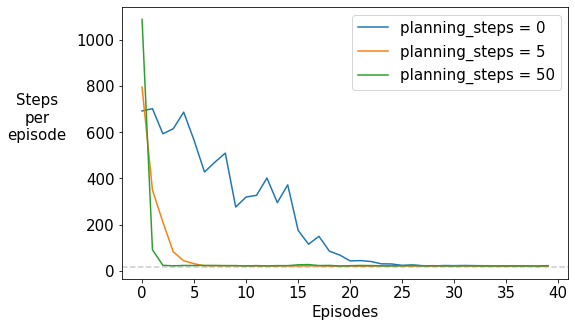

In [3]:
plot_steps_per_episode('Dyna-Q_planning_steps.npy')

## 1.2 Extra: Using Optimism 

### Optimistic State-Value

In [4]:

# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,             # The number of times we run the experiment
    "num_episodes" : 40          # The number of episodes per experiment
}

# Environment parameters 
env_parameters = {
    "count_visits" : False,
    "reward_option" : 'goal', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    "alpha" : 0.125,
    "planning_steps" : 10,
    "kappa" : 0.0,                      # To behave as Dyna-Q
    "model_option" : 'transition+',
    "default_q" : [0.0, 0.5, 1.0]       # List of values to test -- optimistic values, except for 0.0
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_episodes(current_env, current_agent, 
    env_parameters, agent_parameters, experiment_parameters,
    'default_q', 
    'Dyna-Q_optimistic_q.npy')

WITH default_q = 0.0
100%|██████████| 30/30 [00:13<00:00,  2.16it/s]


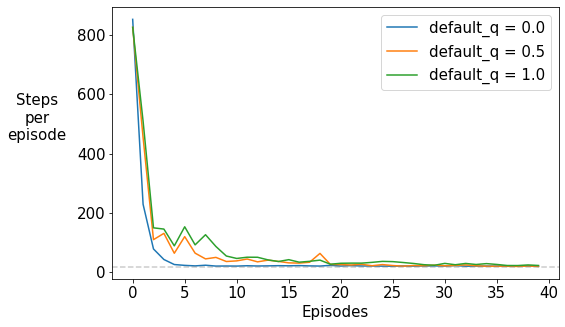

In [5]:
plot_steps_per_episode('Dyna-Q_optimistic_q.npy')

### Optimistic Model

In [6]:

# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,             # The number of times we run the experiment
    "num_episodes" : 40          # The number of episodes per experiment
}

# Environment parameters 
env_parameters = {
    "count_visits" : False,
    "reward_option" : 'goal', 
    "allow_all_actions" : False
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    "alpha" : 0.125,
    "planning_steps" : 10,
    "kappa" : 0.0,                    # To behave as Dyna-Q
    "model_option" : ['transition', 'transition+', 'optimistic_transition+'], # Last one: optimistic
    "default_q" : 0.0
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_episodes(current_env, current_agent, 
    env_parameters, agent_parameters, experiment_parameters,
    'model_option',
    'Dyna-Q_optimistic_model.npy')

WITH model_option = transition
100%|██████████| 30/30 [00:07<00:00,  4.27it/s]
WITH model_option = optimistic_transition+
100%|██████████| 30/30 [01:01<00:00,  2.06s/it]


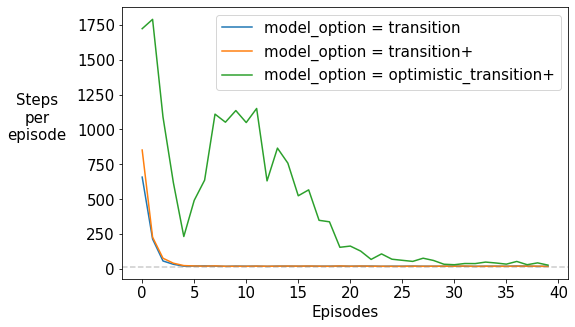

In [7]:
plot_steps_per_episode('Dyna-Q_optimistic_model.npy')

# 2. Dyna-Q in Dynamic Environment

## 2.1 Experiment with Varying Planning Steps

In [8]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 10,                   # The number of times we run the experiment
    "num_max_steps" : 10000,           # The number of steps per experiment
    "count_visits" : True,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True
}

# Agent parameters
agent_parameters = {  
    "epsilon": 0.1, 
    "gamma": 0.95,
    "alpha" : 0.125,
    "kappa" : 0.0,
    "planning_steps" : [5, 10, 50],             # The list of planning_steps we want to try
    "model_option" : 'transition+'              # With 'all' or 'transition': the lines are almost parallel
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

run_num_steps(
    current_env, current_agent, 
    environment_parameters, agent_parameters, experiment_parameters,
    "planning_steps",
    "Dyna-Q_shortcut_steps")

WITH planning_steps = 5
100%|██████████| 10/10 [00:07<00:00,  1.35it/s]
WITH planning_steps = 10
100%|██████████| 10/10 [00:11<00:00,  1.15s/it]
WITH planning_steps = 50
100%|██████████| 10/10 [00:46<00:00,  4.60s/it]


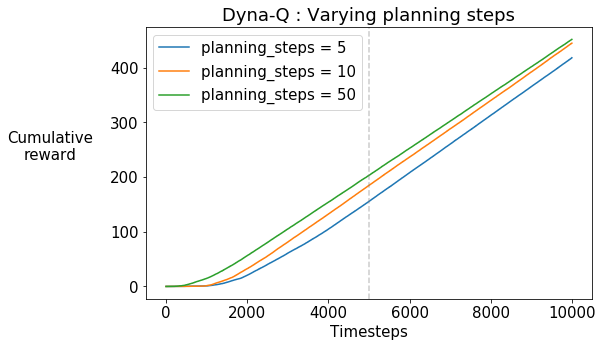

In [9]:
plot_results_per_step('Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q : Varying planning steps', 
    'cum_reward_all', 
    'Cumulative\nreward')

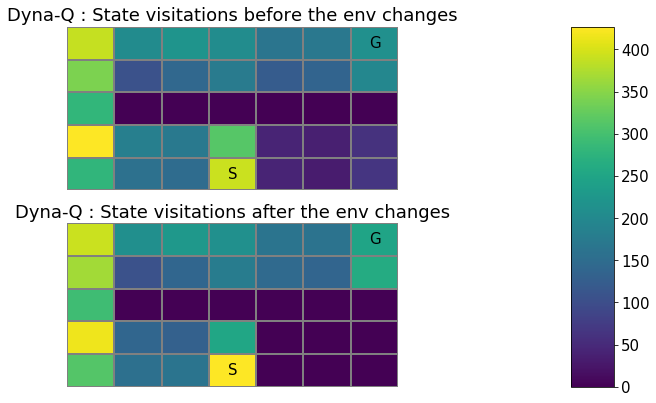

In [10]:
plot_state_visitations(
    "Dyna-Q_shortcut_steps.npy", 
    ['Dyna-Q : State visitations before the env changes', 'Dyna-Q : State visitations after the env changes'],
    2, shape_env) # index 2 is Dyna-Q with 50 planning steps


## 2.2 Experiment with Varying Epsilons

In [11]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 20, #30,      # The number of times we run the experiment
    "num_max_steps" : 10000,   # The number of steps per experiment
    "count_visits" : False,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True
}

# Agent parameters
agent_parameters = {  
    "alpha" : 0.125,
    "gamma": 0.95,
    "planning_steps" : 10,             # Obs.: with more steps, results are similar
    "kappa" : 0.0,
    "epsilon": [0.1, 0.2, 0.4, 0.8],   # The list of epsilons we want to try
    "model_option" : 'transition+'
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

'''run_num_steps(current_env, current_agent, 
    environment_parameters, agent_parameters, experiment_parameters,
    'epsilon',
    'Dyna-Q_epsilons')'''

WITH epsilon = 0.1
100%|██████████| 20/20 [00:23<00:00,  1.15s/it]
WITH epsilon = 0.2
100%|██████████| 20/20 [00:24<00:00,  1.21s/it]
WITH epsilon = 0.4
100%|██████████| 20/20 [00:22<00:00,  1.13s/it]
WITH epsilon = 0.8
100%|██████████| 20/20 [00:22<00:00,  1.12s/it]


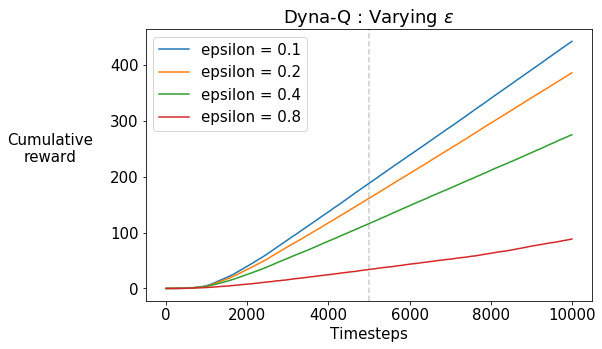

In [12]:
plot_results_per_step('Dyna-Q_epsilons.npy',
    r'Dyna-Q : Varying $\epsilon$',
    'cum_reward_all', 
    'Cumulative\nreward')

# 3. Dyna-Q+ in Dynamic Environment

In [13]:
# Experiment parameters
experiment_parameters = {
    "num_runs" : 30,                     # The number of times we run the experiment
    "num_max_steps" : 10000,             # The number of steps per experiment
    "count_visits" : True,
    "change_at_n" : 5000,                         # Time step where the environment will change
    "env_changer_procedure" : change_environment  # Procedure to change the environment 
}

# Environment parameters
environment_parameters = { 
    "count_visits" : False,
    "use_real_state" : True
}

# Agent parameters
agent_parameters = {  
    "gamma": 0.95,
    "epsilon": 0.1, 
    # parametrizacao obtida com o Optuna em ambiente estatico (foi melhor do que a de ambiente dinamico)
    "alpha" : 0.87,
    "planning_steps" : [50],    # may set additional values
    "kappa" : 0.00050,          # bem ajustado: mudanças +- 0.00010 pioram
    "model_option" : 'transition+'
}

current_env = SimulatedEnv
current_agent = DynaQPlusAgent

In [14]:
run_num_steps(current_env, current_agent, 
    environment_parameters, agent_parameters, experiment_parameters,
    "planning_steps",
    "Dyna-Q+")

WITH planning_steps = 50
100%|██████████| 30/30 [02:21<00:00,  4.71s/it]


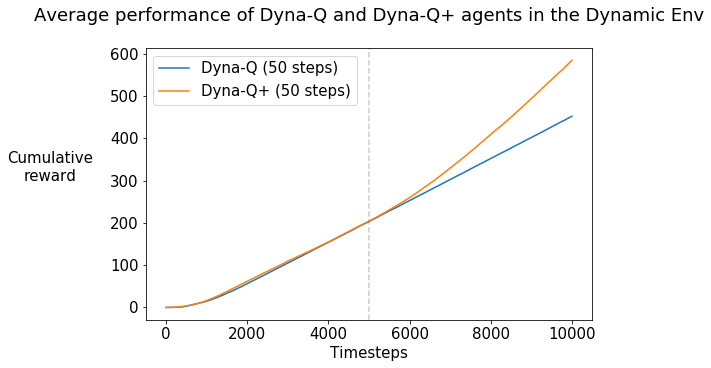

In [15]:
plot_results_comparison(
    'Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q+.npy', 
    agent_parameters['planning_steps'])

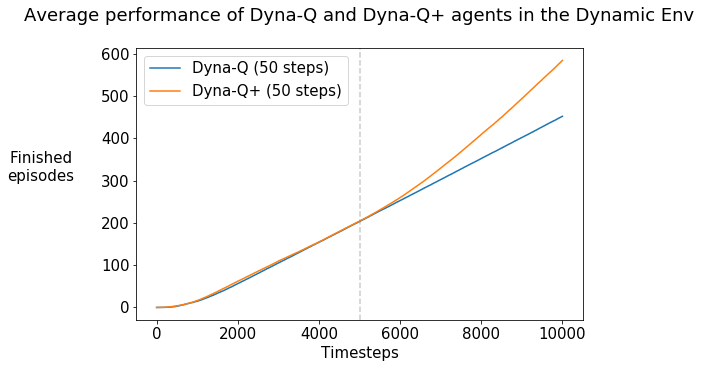

In [17]:
# Same graph as above (because reward option is set to 'goal')
plot_results_comparison(
    'Dyna-Q_shortcut_steps.npy', 
    'Dyna-Q+.npy', 
     agent_parameters['planning_steps'],
    'finished_episodes',
    'Finished\nepisodes')

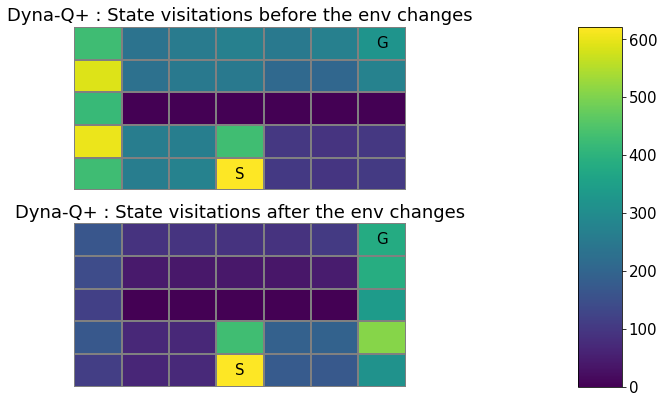

In [16]:
plot_state_visitations(
    'Dyna-Q+.npy', 
    ['Dyna-Q+ : State visitations before the env changes', 
    'Dyna-Q+ : State visitations after the env changes'], 
    len(agent_parameters['planning_steps'])-1,   # last index: DynaQ+ with the most steps
    shape_env)  